# 케라스 Fashion MNIST 모델

<img src="https://www.tensorflow.org/tutorials/keras/classification_files/output_oZTImqg_CaW1_0.png?hl=ko" width="500">

<sub>출처: https://www.tensorflow.org/tutorials/keras/classification?hl=ko</sub>

### modules import


In [29]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.datasets.fashion_mnist import load_data
from keras.models import Model, Sequential
from keras import models
from keras.layers import Input, Dense
from keras.optimizers import RMSprop
from keras.utils import plot_model

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white")

### 데이터셋 로드

In [30]:
seed = 42
tf.random.set_seed(seed)

(x_train_full, y_train_full), (x_test, y_test) = load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.3, random_state=seed)

### 데이터 확인

In [31]:
print(f"Full Train data: {x_train_full.shape}\tLabel: {y_train_full.shape}")
print(f"Train data: {x_train.shape}\tLabel: {y_train.shape}")
print(f"Val data: {x_val.shape}\tLabel: {y_val.shape}")
print(f"Test data: {x_test.shape}\tLabel: {y_test.shape}")

Full Train data: (60000, 28, 28)	Label: (60000,)
Train data: (42000, 28, 28)	Label: (42000,)
Val data: (18000, 28, 28)	Label: (18000,)
Test data: (10000, 28, 28)	Label: (10000,)


In [32]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle bot"]

In [33]:
class_names[y_train[0]]

'Trouser'

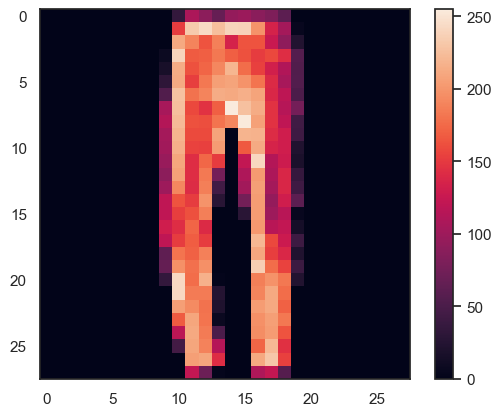

In [34]:
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

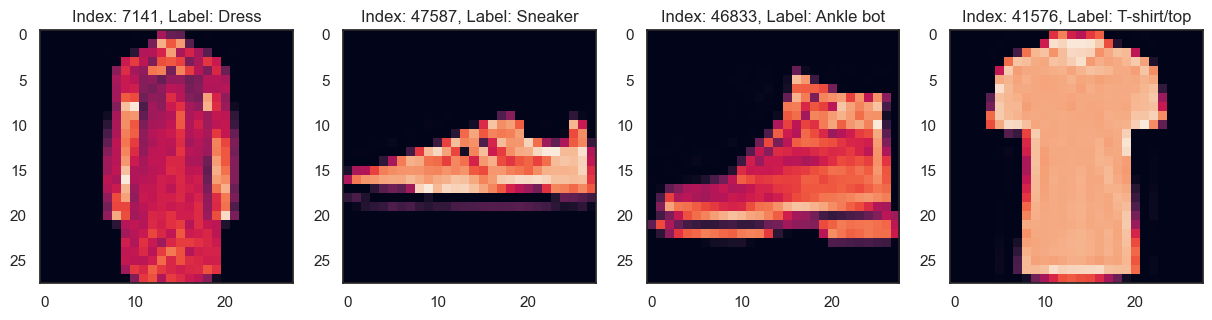

In [35]:
n_samples = 4

random_idxs = np.random.randint(len(x_train_full), size=n_samples)

plt.figure(figsize=(15, 10))

for i, idx in enumerate(random_idxs):
    img = x_train_full[idx, :]
    label = y_train_full[idx]

    plt.subplot(1, len(random_idxs), i + 1)
    plt.imshow(img)
    plt.title(f"Index: {idx}, Label: {class_names[label]}")

### 데이터 전처리
- Normalization

- flatten

- loss='sparse_categorical_crossentropy'

In [36]:
from sklearn.preprocessing import StandardScaler

x_train_preprocessed = x_train.reshape(-1, x_train.shape[1] * x_train.shape[2]) / 255.
x_val_preprocessed = x_val.reshape(-1, x_val.shape[1] * x_val.shape[2]) / 255.
x_test_preprocessed = x_test.reshape(-1, x_test.shape[1] * x_test.shape[2]) / 255.

### 모델 구성 (함수형 API)

In [37]:
inp = Input(shape=(x_train_preprocessed.shape[-1], ), name="Input")
hidden_1 = Dense(256, activation="relu", name="Dense_1")(inp)
hidden_2 = Dense(128, activation="relu", name="Dense_2")(hidden_1)
hidden_3 = Dense(64, activation="relu", name="Dense_3")(hidden_2)
hidden_4 = Dense(32, activation="relu", name="Dense_4")(hidden_3)
out = Dense(10, activation="softmax", name="Output")(hidden_4)

model = Model(inputs=inp, outputs=out)

In [38]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 784)]             0         
                                                                 
 Dense_1 (Dense)             (None, 256)               200960    
                                                                 
 Dense_2 (Dense)             (None, 128)               32896     
                                                                 
 Dense_3 (Dense)             (None, 64)                8256      
                                                                 
 Dense_4 (Dense)             (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 10)                330       
                                                                 
Total params: 244522 (955.16 KB)
Trainable params: 244522 (

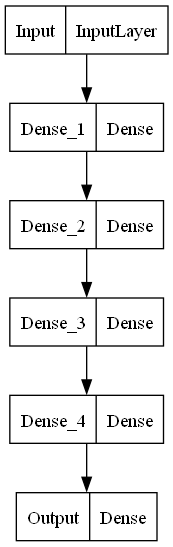

In [39]:
plot_model(model)

### 모델 컴파일

In [40]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=RMSprop(),
    metrics=["acc"]
)

### 모델 학습
- 모델 시각화를 위해 history라는 변수에 학습 과정을 담음

In [41]:
history = model.fit(
    x_train_preprocessed, y_train,
    epochs=50,
    batch_size=128,
    validation_data=(x_val_preprocessed, y_val)
)

Epoch 1/50
329/329 [==============================] - 1s 3ms/step - loss: 0.6720 - acc: 0.7528 - val_loss: 0.5229 - val_acc: 0.8167
Epoch 2/50
329/329 [==============================] - 1s 3ms/step - loss: 0.4351 - acc: 0.8417 - val_loss: 0.5341 - val_acc: 0.8016
Epoch 3/50
329/329 [==============================] - 1s 3ms/step - loss: 0.3779 - acc: 0.8599 - val_loss: 0.8840 - val_acc: 0.7081
Epoch 4/50
329/329 [==============================] - 1s 3ms/step - loss: 0.3468 - acc: 0.8723 - val_loss: 0.4667 - val_acc: 0.8150
Epoch 5/50
329/329 [==============================] - 1s 3ms/step - loss: 0.3229 - acc: 0.8794 - val_loss: 0.5694 - val_acc: 0.8283
Epoch 6/50
329/329 [==============================] - 1s 3ms/step - loss: 0.3068 - acc: 0.8855 - val_loss: 0.3755 - val_acc: 0.8672
Epoch 7/50
329/329 [==============================] - 1s 3ms/step - loss: 0.2896 - acc: 0.8911 - val_loss: 0.3934 - val_acc: 0.8590
Epoch 8/50
329/329 [==============================] - 1s 3ms/step - loss: 0.

### 학습 결과 시각화

In [42]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

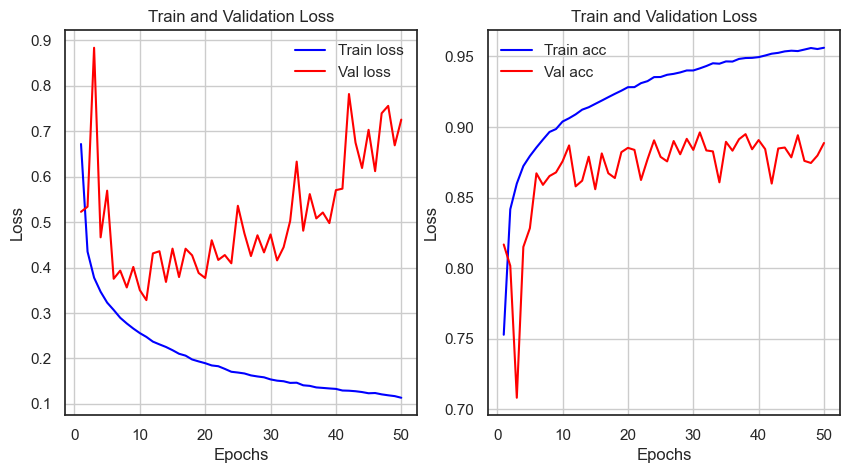

In [44]:
history_dict = history.history

loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 5))

ax_1 = fig.add_subplot(1, 2, 1)
ax_1.plot(epochs, loss, color="blue", label="Train loss")
ax_1.plot(epochs, val_loss, color="red", label="Val loss")
ax_1.set_title("Train and Validation Loss")
ax_1.set_xlabel("Epochs")
ax_1.set_ylabel("Loss")
ax_1.grid()
ax_1.legend()

acc = history_dict["acc"]
val_acc = history_dict["val_acc"]

ax_2 = fig.add_subplot(1, 2, 2)
ax_2.plot(epochs, acc, color="blue", label="Train acc")
ax_2.plot(epochs, val_acc, color="red", label="Val acc")
ax_2.set_title("Train and Validation Loss")
ax_2.set_xlabel("Epochs")
ax_2.set_ylabel("Loss")
ax_2.grid()
ax_2.legend()

plt.show()

### 다른 옵티마이저로 실행
- 아래의 과정 다시 실행
  - 데이터셋 로드
  - 데이터 전처리
  - 모델 구성


In [45]:
from keras.optimizers import SGD

In [46]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=SGD(),
    metrics=["acc"]
)

In [47]:
history_2 = model.fit(
    x_train_preprocessed, y_train,
    epochs=50,
    batch_size=128,
    validation_data=(x_val_preprocessed, y_val)
)

Epoch 1/50
329/329 [==============================] - 1s 3ms/step - loss: 0.0732 - acc: 0.9716 - val_loss: 0.6646 - val_acc: 0.8999
Epoch 2/50
329/329 [==============================] - 1s 3ms/step - loss: 0.0615 - acc: 0.9764 - val_loss: 0.6753 - val_acc: 0.8995
Epoch 3/50
329/329 [==============================] - 1s 2ms/step - loss: 0.0577 - acc: 0.9772 - val_loss: 0.6762 - val_acc: 0.9003
Epoch 4/50
329/329 [==============================] - 1s 2ms/step - loss: 0.0553 - acc: 0.9785 - val_loss: 0.6979 - val_acc: 0.9009
Epoch 5/50
329/329 [==============================] - 1s 2ms/step - loss: 0.0541 - acc: 0.9787 - val_loss: 0.6880 - val_acc: 0.9006
Epoch 6/50
329/329 [==============================] - 1s 2ms/step - loss: 0.0525 - acc: 0.9793 - val_loss: 0.6861 - val_acc: 0.8963
Epoch 7/50
329/329 [==============================] - 1s 2ms/step - loss: 0.0525 - acc: 0.9790 - val_loss: 0.6954 - val_acc: 0.8997
Epoch 8/50
329/329 [==============================] - 1s 2ms/step - loss: 0.

In [48]:
history_2.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

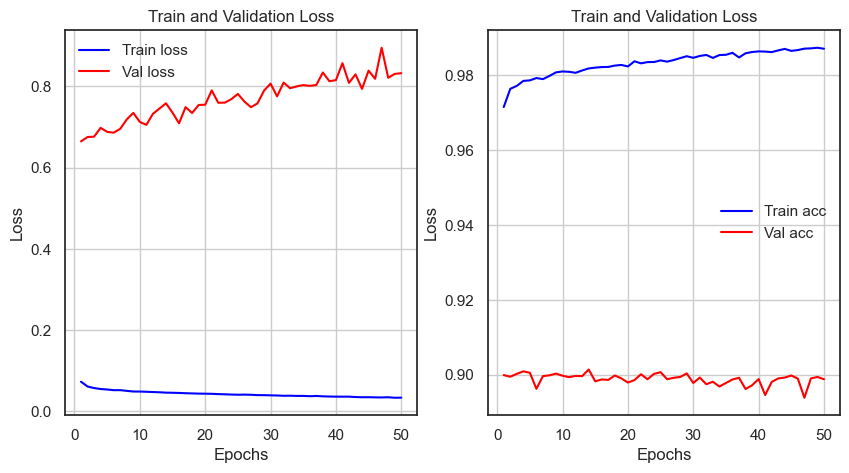

In [49]:
history_2_dict = history_2.history

loss = history_2_dict["loss"]
val_loss = history_2_dict["val_loss"]

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 5))

ax_1 = fig.add_subplot(1, 2, 1)
ax_1.plot(epochs, loss, color="blue", label="Train loss")
ax_1.plot(epochs, val_loss, color="red", label="Val loss")
ax_1.set_title("Train and Validation Loss")
ax_1.set_xlabel("Epochs")
ax_1.set_ylabel("Loss")
ax_1.grid()
ax_1.legend()

acc = history_2_dict["acc"]
val_acc = history_2_dict["val_acc"]

ax_2 = fig.add_subplot(1, 2, 2)
ax_2.plot(epochs, acc, color="blue", label="Train acc")
ax_2.plot(epochs, val_acc, color="red", label="Val acc")
ax_2.set_title("Train and Validation Loss")
ax_2.set_xlabel("Epochs")
ax_2.set_ylabel("Loss")
ax_2.grid()
ax_2.legend()

plt.show()

### 모델 평가 (1)
- optimizer: SGD()로 학습한 모델

- evaluate

In [50]:
model.evaluate(x_test_preprocessed, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.9703 - acc: 0.8933


[0.9702601432800293, 0.8932999968528748]

### 학습된 모델을 통해 값 예측

In [51]:
y_pred = model.predict(x_test_preprocessed)

print(y_pred.shape)
np.set_printoptions(precision=7)
print(y_pred[0])

313/313 [==============================] - 0s 1ms/step
(10000, 10)
[1.0353311e-30 8.1045590e-14 1.6126295e-32 6.9559196e-25 2.6033605e-21
 3.0371836e-09 1.2882382e-25 2.0397634e-14 5.9591200e-24 1.0000000e+00]


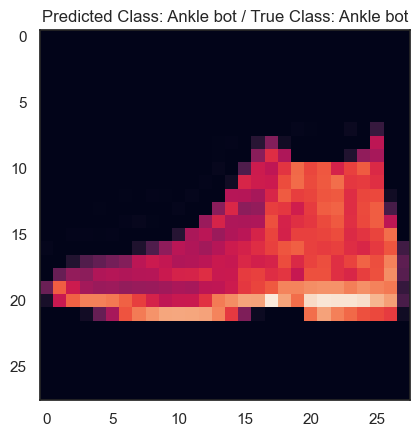

In [97]:
arg_y_pred = np.argmax(y_pred, axis=1)

plt.imshow(x_test_preprocessed[0].reshape(-1, x_test.shape[-1]))
plt.title(f"Predicted Class: {class_names[arg_y_pred[0]]} / True Class: {class_names[y_test[0]]}")

plt.show()

In [79]:
def plot_img(i, y_pred, y_test, img):
    y_pred_prob, y_test_item, img_tensor = y_pred[i], y_test[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img_tensor, cmap=plt.cm.binary)

    y_pred_item = np.argmax(y_pred_prob)

    if y_pred_item == y_test[i]:
        color = "blue"
    else:
        color = "red"
    
    plt.xlabel(
        f"{class_names[y_pred_item]} {100 * np.max(y_pred_prob):2.0f}% ({class_names[y_test_item]})",
        color=color
    )

def plot_value_arr(i, y_pred, y_test):
    y_pred_prob, y_test_item = y_pred[i], y_test[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    this_plot = plt.bar(range(10), y_pred_prob, color="#777777")
    plt.ylim([0, 1])
    y_pred_item = np.argmax(y_pred_prob)

    this_plot[y_pred_item].set_color("red")
    this_plot[y_test_item].set_color("blue")

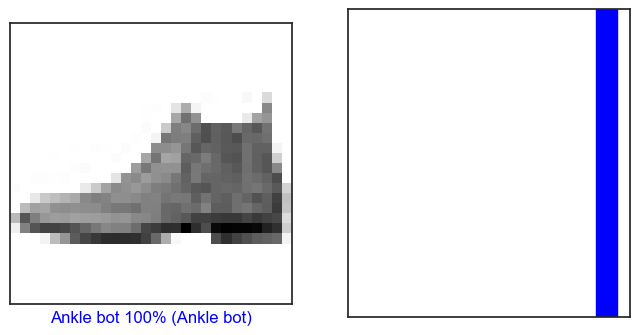

In [80]:
i = 0
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_img(i, y_pred, y_test, x_test)

plt.subplot(1, 2, 2)
plot_value_arr(i, y_pred, y_test)

plt.show()

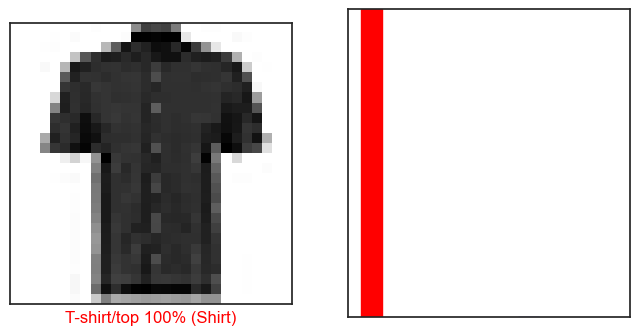

In [81]:
i = 40
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_img(i, y_pred, y_test, x_test)

plt.subplot(1, 2, 2)
plot_value_arr(i, y_pred, y_test)

plt.show()

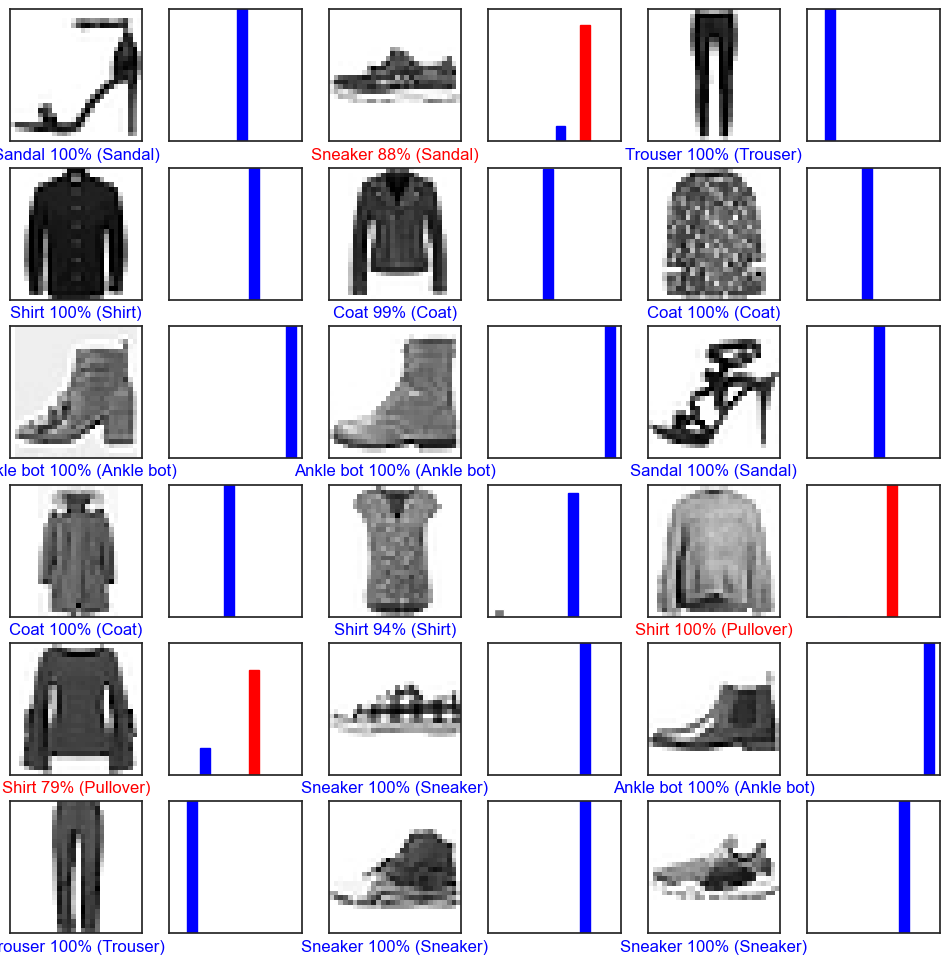

In [90]:
n_rows = 6
n_cols = 3
n_imgs = n_rows * n_cols

rand_n = np.random.randint(x_test.shape[0], size=n_imgs)
plt.figure(figsize=(2 * 2 * n_cols, 2 * n_rows))

for idx, n in enumerate(rand_n):
    plt.subplot(n_rows, 2 * n_cols, 2 * idx + 1)
    plot_img(n, y_pred, y_test, x_test)
    plt.subplot(n_rows, 2 * n_cols, 2 * idx + 2)
    plot_value_arr(n, y_pred, y_test)

plt.show()

### 모델 평가(2)
- optimizer: SGD()로 설정한 모델

- 혼동 행렬 (Confusion Matrix)

In [91]:
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils import to_categorical

In [92]:
y_test_ohe = to_categorical(y_test)

y_test_ohe.shape

(10000, 10)

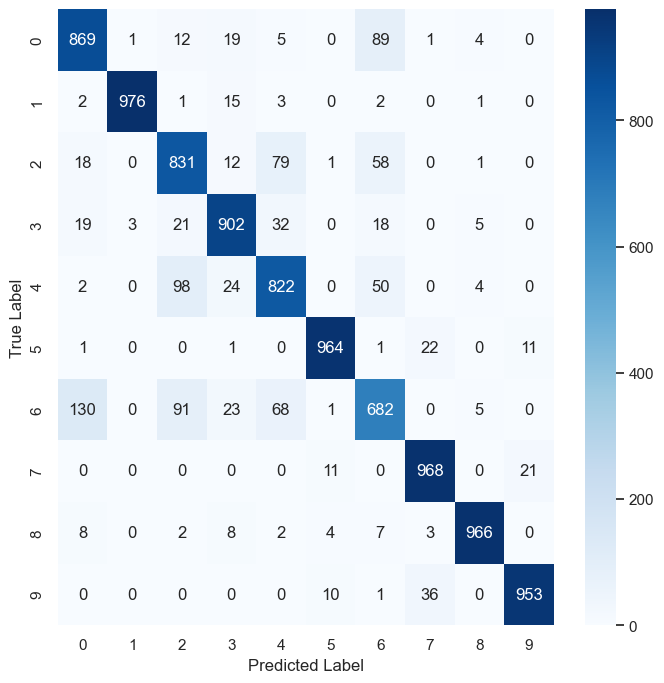

In [96]:
plt.figure(figsize=(8, 8))
cm = confusion_matrix(np.argmax(y_test_ohe, axis=1), np.argmax(y_pred, axis=1))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

### 모델 평가 (3)
- optimizer: SGD()로 설정한 모델

- 분류 보고서

In [102]:
print(classification_report(np.argmax(y_test_ohe, axis=1), np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       1.00      0.98      0.99      1000
           2       0.79      0.83      0.81      1000
           3       0.90      0.90      0.90      1000
           4       0.81      0.82      0.82      1000
           5       0.97      0.96      0.97      1000
           6       0.75      0.68      0.71      1000
           7       0.94      0.97      0.95      1000
           8       0.98      0.97      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

